<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0__1)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-1'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20-1.csv',
 'data_multi_delta_0_n30-1.csv',
 'data_multi_delta_0_n60-1.csv',
 'data_multi_delta_0_n120-1.csv',
 'data_multi_delta_0_n250-1.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250-1.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,0.847778,215.334518,214.433879,0.900639
1,0.0,1.0,88.215495,94.604408,36.752253,0.261214,229.833370,229.468945,0.364424
2,0.0,2.0,75.723322,35.232029,46.417423,-0.860624,166.512150,167.431832,-0.919682
3,0.0,3.0,38.055184,66.641168,96.212257,-2.585431,208.323178,210.929364,-2.606186
4,0.0,4.0,68.821230,68.543753,46.272811,-1.501497,192.136298,193.633387,-1.497090
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-1.607962,177.149477,178.888628,-1.739152
249996,999.0,246.0,32.379447,24.201317,94.176224,-0.654297,160.102691,160.588999,-0.486308
249997,999.0,247.0,73.636953,77.707721,80.827540,1.138527,243.310740,241.996619,1.314121
249998,999.0,248.0,96.730468,97.527144,33.411083,1.507330,239.176024,237.692929,1.483096


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,0.847778,215.334518,214.433879,0.900639
1,0.0,1.0,88.215495,94.604408,36.752253,0.261214,229.833370,229.468945,0.364424
2,0.0,2.0,75.723322,35.232029,46.417423,-0.860624,166.512150,167.431832,-0.919682
3,0.0,3.0,38.055184,66.641168,96.212257,-2.585431,208.323178,210.929364,-2.606186
4,0.0,4.0,68.821230,68.543753,46.272811,-1.501497,192.136298,193.633387,-1.497090
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-1.607962,177.149477,178.888628,-1.739152
249996,999.0,246.0,32.379447,24.201317,94.176224,-0.654297,160.102691,160.588999,-0.486308
249997,999.0,247.0,73.636953,77.707721,80.827540,1.138527,243.310740,241.996619,1.314121
249998,999.0,248.0,96.730468,97.527144,33.411083,1.507330,239.176024,237.692929,1.483096


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    57.585513  99.226585  47.674641  ...  215.334518  214.433879  0.900639
      1.0    88.215495  94.604408  36.752253  ...  229.833370  229.468945  0.364424
      2.0    75.723322  35.232029  46.417423  ...  166.512150  167.431832 -0.919682
      3.0    38.055184  66.641168  96.212257  ...  208.323178  210.929364 -2.606186
      4.0    68.821230  68.543753  46.272811  ...  192.136298  193.633387 -1.497090
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  82.142416  53.368686  33.246337  ...  177.149477  178.888628 -1.739152
      246.0  32.379447  24.201317  94.176224  ...  160.102691  160.588999 -0.486308
      247.0  73.636953  77.707721  80.827540  ...  243.310740  241.996619  1.314121
      248.0  96.730468  97.527144  33.411083  ...  239.176024  237.692929  1.483096
      249.0  92.431783  65.077315  73.380665  ...  241.275040  240.838819  0.436221

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    57.585513  99.226585  47.674641  ...  215.334518  214.433879  0.900639
      1.0    88.215495  94.604408  36.752253  ...  229.833370  229.468945  0.364424
      2.0    75.723322  35.232029  46.417423  ...  166.512150  167.431832 -0.919682
      3.0    38.055184  66.641168  96.212257  ...  208.323178  210.929364 -2.606186
      4.0    68.821230  68.543753  46.272811  ...  192.136298  193.633387 -1.497090
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  82.142416  53.368686  33.246337  ...  177.149477  178.888628 -1.739152
      246.0  32.379447  24.201317  94.176224  ...  160.102691  160.588999 -0.486308
      247.0  73.636953  77.707721  80.827540  ...  243.310740  241.996619  1.314121
      248.0  96.730468  97.527144  33.411083  ...  239.176024  237.692929  1.483096
      249.0  92.431783  65.077315  73.380665  ...  241.275040  240.838819  0.436221

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,0.847778,215.334518,214.433879,0.900639
1,0.0,1.0,88.215495,94.604408,36.752253,0.261214,229.833370,229.468945,0.364424
2,0.0,2.0,75.723322,35.232029,46.417423,-0.860624,166.512150,167.431832,-0.919682
3,0.0,3.0,38.055184,66.641168,96.212257,-2.585431,208.323178,210.929364,-2.606186
4,0.0,4.0,68.821230,68.543753,46.272811,-1.501497,192.136298,193.633387,-1.497090
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-1.607962,177.149477,178.888628,-1.739152
249996,999.0,246.0,32.379447,24.201317,94.176224,-0.654297,160.102691,160.588999,-0.486308
249997,999.0,247.0,73.636953,77.707721,80.827540,1.138527,243.310740,241.996619,1.314121
249998,999.0,248.0,96.730468,97.527144,33.411083,1.507330,239.176024,237.692929,1.483096


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    57.585513  99.226585  47.674641  ...  215.334518  214.433879  0.900639
      1.0    88.215495  94.604408  36.752253  ...  229.833370  229.468945  0.364424
      2.0    75.723322  35.232029  46.417423  ...  166.512150  167.431832 -0.919682
      3.0    38.055184  66.641168  96.212257  ...  208.323178  210.929364 -2.606186
      4.0    68.821230  68.543753  46.272811  ...  192.136298  193.633387 -1.497090
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  82.142416  53.368686  33.246337  ...  177.149477  178.888628 -1.739152
      246.0  32.379447  24.201317  94.176224  ...  160.102691  160.588999 -0.486308
      247.0  73.636953  77.707721  80.827540  ...  243.310740  241.996619  1.314121
      248.0  96.730468  97.527144  33.411083  ...  239.176024  237.692929  1.483096
      249.0  92.431783  65.077315  73.380665  ...  241.275040  240.838819  0.436221

[250000 rows x 7 columns]

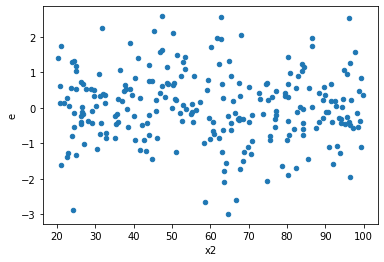

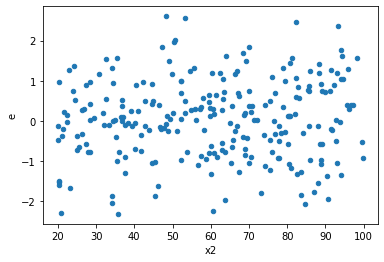

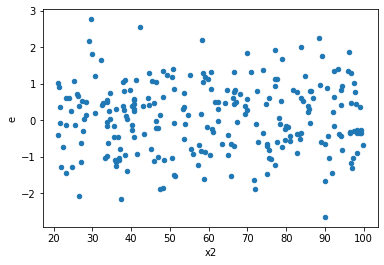

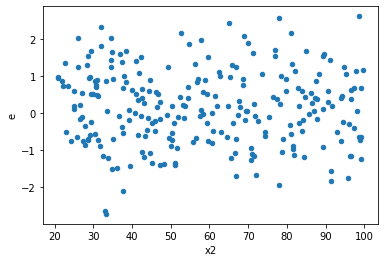

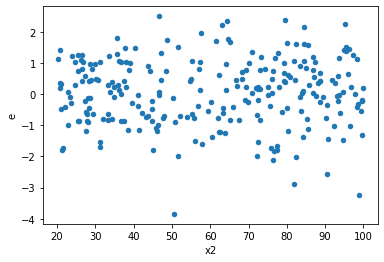

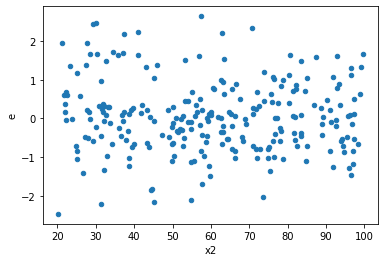

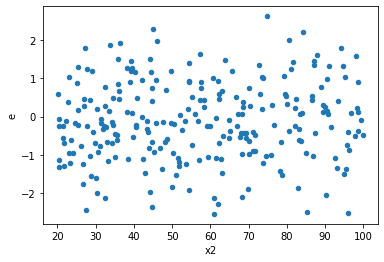

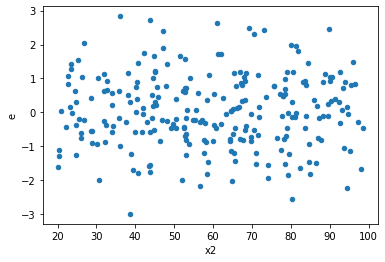

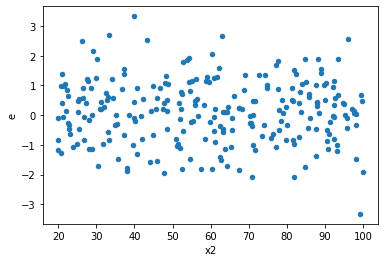

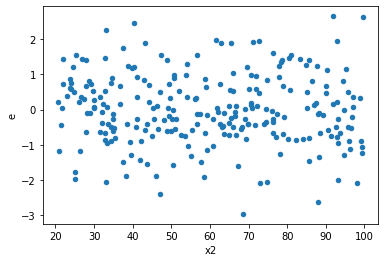

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,97.0,97.0,89.57795501887296,103.17201311680795,0.923484072359515,1.0636290012042056,1.151756736298243,0.48787905901414286,0.7560604704929286,0.24393952950707143,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,97.21888651163279,102.66180009713523,1.0022565619755959,1.0583690731663427,1.0559861749172694,0.789044381911334,0.605477809044333,0.394522190955667,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,92.14796582445881,119.49227165489002,0.949979029118132,1.2318790892256704,1.2967434558731543,0.20246326332730602,0.898768368336347,0.10123163166365301,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,95.79065846417956,105.33360244810225,0.9875325614863872,1.0859134273000233,1.099622908297381,0.6409516398270831,0.6795241800864584,0.32047581991354157,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,107.65237292047571,115.23949381174852,1.1098182775306775,1.1880360186778198,1.070477971692064,0.7380143753664568,0.6309928123167716,0.3690071876832284,Reject001=1 : Homoscedasticity
9.0,97.0,97.0,94.73803604483786,115.49526913589115,0.9766807839674005,1.1906728776895994,1.2191013658044298,0.33090366450472297,0.8345481677476385,0.16545183225236149,Reject001=1 : Homoscedasticity
10.0,97.0,97.0,93.25235810289539,93.73732045675222,0.9613645165246947,0.966364128420126,1.0052005371630572,0.9796740537021269,0.5101629731489365,0.48983702685106345,Reject001=1 : Homoscedasticity
12.0,97.0,97.0,95.27289456559856,109.14759047851682,0.9821947893360676,1.1252328915311012,1.1456310945120394,0.5044371739038482,0.7477814130480759,0.2522185869519241,Reject001=1 : Homoscedasticity
13.0,97.0,97.0,96.06888578170638,111.37704532468275,0.9904008843474885,1.1482169621101315,1.1593456551350092,0.46789912654832566,0.7660504367258372,0.23394956327416283,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,84.27366604963053,80.61466860725454,0.8688006809240262,0.8310790578067478,0.9565819595385688,0.8274151195507347,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,89.57795501887296,103.17201311680795,0.923484072359515,1.0636290012042056,1.151756736298243,0.48787905901414286,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,91.81234230703684,89.38546400514807,0.9465189928560499,0.9214996289190522,0.9735669710530545,0.8953186032392112,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,97.21888651163279,102.66180009713523,1.0022565619755959,1.0583690731663427,1.0559861749172694,0.789044381911334,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,92.14796582445881,119.49227165489002,0.949979029118132,1.2318790892256704,1.2967434558731543,0.20246326332730602,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,96.35156868962534,68.53441275890697,0.9933151411301582,0.7065403377206904,0.7112952460553599,0.09506454108273305,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,95.79065846417956,105.33360244810225,0.9875325614863872,1.0859134273000233,1.099622908297381,0.6409516398270831,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,107.65237292047571,115.23949381174852,1.1098182775306775,1.1880360186778198,1.070477971692064,0.7380143753664568,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,105.61252161569377,96.62753433547051,1.0887888826360181,0.9961601477883558,0.914924981027173,0.6623666105546602,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      991
Reject001=0 : Heteroscedasticity      9
Name: Result_test, dtype: int64